In [1]:
import pandas as pd
commande_par_mois = pd.ExcelFile('D:/Commandes toner drop/commandes_by_month_sum_tonerdrop.xlsx')
#commande_par_mois = pd.ExcelFile('quantite_tot_month.xlsx')
commandes = commande_par_mois.parse()

In [48]:
#commande1=pd.Series(commandes['quantites'].values,pd.to_datetime(commandes['date']))

In [3]:
df=commandes[commandes['reference']=='6AJ00000047']
df2=commandes[commandes['reference']=='6AJ00000114']
commandes1=pd.Series(df['quantites'].values,pd.to_datetime(df['date']))
commandes1=commandes1.sort_index()
commandes2=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes2=commandes2.sort_index()

In [4]:
df1=commandes[commandes['reference']=='6AJ00000047']
df2=commandes[commandes['reference']=='6AJ00000075']
df3=commandes[commandes['reference']=='6AJ00000114']
df4=commandes[commandes['reference']=='6AJ00000139']
commandes1=pd.Series(df1['quantites'].values,pd.to_datetime(df1['date']))
commandes1=commandes1.sort_index()
commandes2=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes2=commandes2.sort_index()
commandes3=pd.Series(df3['quantites'].values,pd.to_datetime(df3['date']))
commandes3=commandes3.sort_index()
commandes4=pd.Series(df4['quantites'].values,pd.to_datetime(df4['date']))
commandes4=commandes4.sort_index()

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot( commandes3, label='6AJ00000075')
trend2=seasonal_decompose(commandes3,freq=12).trend
plt.plot(seasonal_decompose(commandes3,freq=12).trend,label='tendance')

plt.legend()
plt.show()

NameError: name 'seasonal_decompose' is not defined

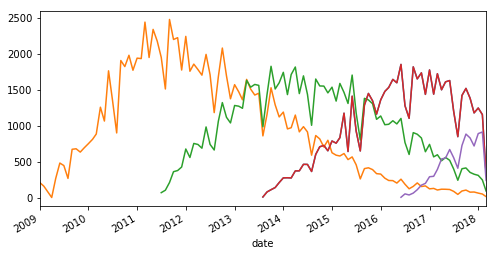

In [6]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
commandes1.plot(figsize=(8,4))
commandes2.plot()
commandes3.plot()
commandes4.plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
commandes2.plot()
#trend1=seasonal_decompose(commandes1).trend
trend2=seasonal_decompose(commandes2,freq=12).trend
plt.plot(seasonal_decompose(commandes2,freq=12).trend)
plt.show()

In [10]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
d =range(0,2)
p = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [11]:
import numpy as np
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
import statsmodels.api as sm
comm_trans=commandes2[commandes3.index].fillna(0)
X = commandes1
pourc=0.82
size = int(len(X) * pourc)
train, test = X[0:size], X[size:len(X)]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, 
                                            #comm_trans[train.index],
                                            #trend=np.poly1d([1,0,1]),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            #start_params=[1, 0, 0,0,2,2,3]
            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1532.593465467203
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1259.1810870850147
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1211.5975279769998
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:974.7998451208351
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1224.720215265497
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1187.5780321242676
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:997.0968859832889
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:976.7765001589014
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1432.4408960351398
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1186.363953607334
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1153.6535989225415
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:937.446672078795
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1180.519599894627
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1145.4719654214232
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:978.420203182128
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:938.187443363198
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1250.9552799372236
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1074.2170961559445
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1085.7

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3804      0.167     -2.273      0.023      -0.708      -0.052
ma.L1         -0.1835      0.212     -0.865      0.387      -0.599       0.232
ma.S.L12      -0.3764      0.138     -2.720      0.007      -0.648      -0.105
sigma2      3.964e+04   6813.756      5.818      0.000    2.63e+04     5.3e+04


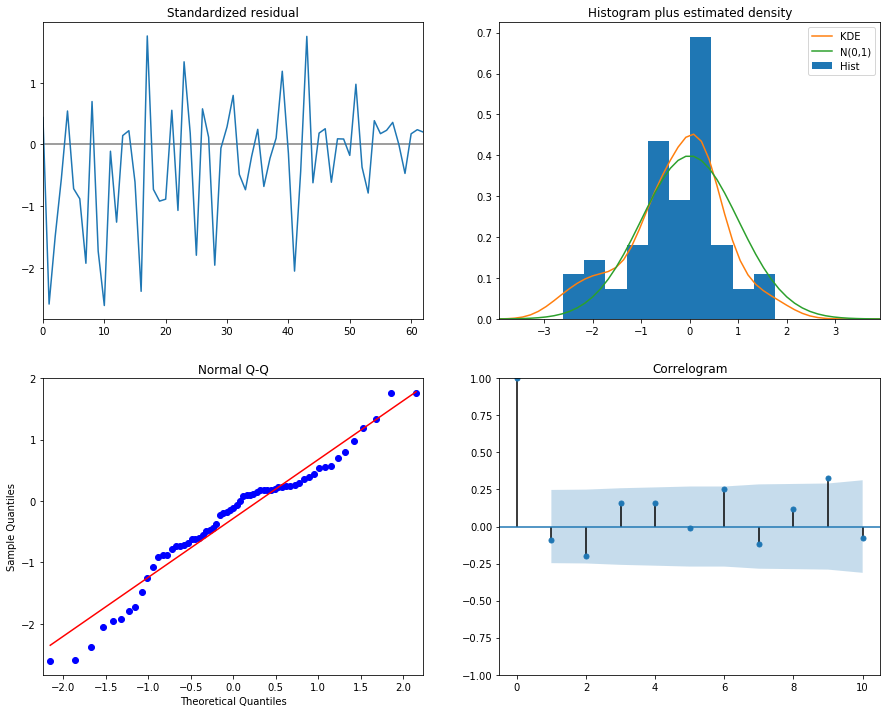

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train,
                                #comm_trans,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [12]:
import numpy as np
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
import statsmodels.tsa.api as smt
import statsmodels.api as sm
#df=commandes[commandes['PRODUIT']=='6AG00004479']
#commandes=pd.Series(df['NB_COMMANDE'].values,pd.to_datetime(df['DATE_COMMANDE']))
X = commandes1
pourc=0.82
size = int(len(X) * pourc)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions=[]
dfpredictions = pd.DataFrame(columns=["expected","1 month ahead forecast","1 year ahead forecast","delta_mois",
                                      "delta_annee","ic_inf","ic_sup"])
start_params=[1, 0, 0,0,2,2,3]
for t in range(len(test)):
        model = sm.tsa.statespace.SARIMAX(history #,comm_trans.values[0:size+t]
                            #,trend=np.poly1d([1,0,1])
                            , order=(0,1,1), seasonal_order=(0,1,1,12)
                  ,enforce_stationarity=False,enforce_invertibility=False)
        model_fit = model.fit()
        if t == 0:
            output1 = model_fit.forecast(len(test)#,exog=comm_trans.values[size+t:size+t+len(test)].reshape(-1,1)
                                        )
            #min(12,len(test)-t)                                
        output = model_fit.get_forecast(1#,exog=comm_trans.values[size+t:size+t+1].reshape(-1,1)
        )
        pred=output.predicted_mean[0]
        ci=output.conf_int()
        predictions.append(pred)
        obs = test[t]
        dfpredictions=dfpredictions.append({"expected":obs,
                                            "1 month ahead forecast":pred,
                                            "1 year ahead forecast":output1[t],
                                            "delta_mois":pred-obs,
                                            "delta_annee":output1[t]-obs,
                                            "ic_inf":ci[0,0],
                                            "ic_sup":ci[0,1]},    
                                           ignore_index=True)
        history.append(obs)
    #print('ci_low=%f, predicted=%f, ci_upp=%f,predict_dyn=%f, expected=%f' % (ci['lower y'], pred,ci['upper y'],output1.predicted_mean[t], obs))
#error = mean_squared_error(test, predictions)
#error2 = mean_squared_error(test, output1.predicted_mean)
#print('Test MSE: %.3f, MSE_dyn: %.3f' % (error,error2))

dfpredictions.index=test.index
dfpredictions

,expected,1 month ahead forecast,1 year ahead forecast,delta_mois,delta_annee,ic_inf,ic_sup
date,,,,,,,
2016-08-01,124.0,-123.948362,-123.948362,-247.948362,-247.948362,-525.470115,277.573390
2016-09-01,157.0,246.345625,113.545616,89.345625,-43.454384,-156.810715,649.501965
2016-10-01,205.0,234.522671,160.800126,29.522671,-44.199874,-166.176881,635.222224
2016-11-01,155.0,140.189250,76.292567,-14.810750,-78.707433,-257.547545,537.926045
2016-12-01,164.0,101.976937,23.005258,-62.023063,-140.994742,-292.796534,496.750408
2017-01-01,123.0,113.404289,5.969051,-9.595711,-117.030949,-278.754744,505.563323
2017-02-01,129.0,44.080658,-74.663627,-84.919342,-203.663627,-345.229093,433.390410
2017-03-01,107.0,71.998031,-90.904829,-35.001969,-197.904829,-315.049376,459.045438
2017-04-01,118.0,121.918798,-55.812806,3.918798,-173.812806,-262.472663,506.310259


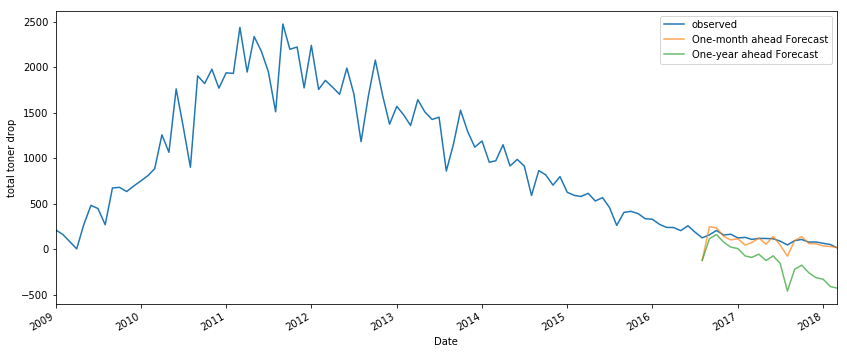

In [14]:
ax = commandes1.plot(label='observed',figsize=(14,6))
dfpredictions['1 month ahead forecast'] .plot(ax=ax, label='One-month ahead Forecast', alpha=.7)
dfpredictions['1 year ahead forecast'] .plot(ax=ax, label='One-year ahead Forecast', alpha=.7)
#ax.fill_between(dfpredictions.index,
                #dfpredictions['ic_inf'] ,
                #dfpredictions['ic_sup'], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('total toner drop')

plt.legend()

plt.show()

In [6]:
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, Input,LSTM, Flatten, Bidirectional, GRU
from keras.models import Model, Sequential

Using TensorFlow backend.


In [41]:
look_back=12
def rnn_timeseries_network():
    # This returns a tensor
    my_inputs = Input((1, look_back))
# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN=Bidirectional(SimpleRNN(10))(my_inputs)
    out = Dense(1)(out_SimpleRNN)
    network = Model( inputs=my_inputs , outputs=out )
    network.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])
    return network
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
modelnn=rnn_timeseries_network()

In [43]:
look_back = 12
from sklearn.preprocessing import MinMaxScaler
import numpy as np
dataset=[[float(x)] for x in commandes2.values] 

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * pourc)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size-12:len(dataset),:]
print(len(train), len(test))
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
modelnn.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
testPredict = modelnn.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
#testPredict=np.insert(testPredict,len(testPredict),0)
dfpredictions['rnn(1 month ahead forecast)']=testPredict
dfpredictions['delta_rnn']=dfpredictions['rnn(1 month ahead forecast)']-dfpredictions['expected']
dfprediction=dfpredictions.append({
                                            "delta_mois":sum(dfpredictions['delta_mois']**2)**0.5,
                                            "delta_annee":sum(dfpredictions['delta_annee']**2)**0.5,
                                            "delta_rnn":sum(dfpredictions['delta_rnn']**2)**0.5
                                            },ignore_index=True)    
dfprediction.index=dfpredictions.index.insert(len(dfpredictions.index),'')                                           
dfprediction

66 27
Epoch 1/100
 - 1s - loss: 0.0369 - acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.0217 - acc: 0.0185
Epoch 3/100
 - 0s - loss: 0.0205 - acc: 0.0185
Epoch 4/100
 - 0s - loss: 0.0201 - acc: 0.0185
Epoch 5/100
 - 0s - loss: 0.0190 - acc: 0.0185
Epoch 6/100
 - 0s - loss: 0.0163 - acc: 0.0185
Epoch 7/100
 - 0s - loss: 0.0161 - acc: 0.0185
Epoch 8/100
 - 0s - loss: 0.0164 - acc: 0.0185
Epoch 9/100
 - 0s - loss: 0.0164 - acc: 0.0185
Epoch 10/100
 - 0s - loss: 0.0153 - acc: 0.0185
Epoch 11/100
 - 0s - loss: 0.0149 - acc: 0.0185
Epoch 12/100
 - 0s - loss: 0.0152 - acc: 0.0185
Epoch 13/100
 - 0s - loss: 0.0151 - acc: 0.0185
Epoch 14/100
 - 0s - loss: 0.0147 - acc: 0.0185
Epoch 15/100
 - 0s - loss: 0.0138 - acc: 0.0185
Epoch 16/100
 - 0s - loss: 0.0140 - acc: 0.0185
Epoch 17/100
 - 0s - loss: 0.0137 - acc: 0.0185
Epoch 18/100
 - 0s - loss: 0.0144 - acc: 0.0185
Epoch 19/100
 - 0s - loss: 0.0132 - acc: 0.0185
Epoch 20/100
 - 0s - loss: 0.0130 - acc: 0.0185
Epoch 21/100
 - 0s - loss: 0.0133 - acc

,expected,1 month ahead forecast,1 year ahead forecast,delta_mois,delta_annee,ic_inf,ic_sup,rnn(1 month ahead forecast),delta_rnn
date,,,,,,,,,
2017-01-01 00:00:00,740.0,738.984375,738.984375,-1.015625,-1.015625,437.488583,1040.480166,758.743286,18.743286
2017-02-01 00:00:00,567.0,588.262302,587.648975,21.262302,20.648975,290.578194,885.946410,715.290649,148.290649
2017-03-01 00:00:00,596.0,667.652407,678.236248,71.652407,82.236248,373.546963,961.757852,633.263794,37.263794
2017-04-01 00:00:00,513.0,650.942954,702.566582,137.942954,189.566582,359.412885,942.473023,743.594238,230.594238
2017-05-01 00:00:00,559.0,480.641468,600.344690,-78.358532,41.344690,189.488797,771.794140,709.602295,150.602295
2017-06-01 00:00:00,519.0,683.139959,770.578362,164.139959,251.578362,394.327975,971.951943,818.071655,299.071655
2017-07-01 00:00:00,398.0,234.203359,411.920181,-163.796641,13.920181,-55.418330,523.825047,425.720032,27.720032
2017-08-01 00:00:00,242.0,83.037373,158.901684,-158.962627,-83.098316,-207.226137,373.300884,256.773834,14.773834
2017-09-01 00:00:00,402.0,541.692991,564.027137,139.692991,162.027137,250.983870,832.402113,373.233093,-28.766907


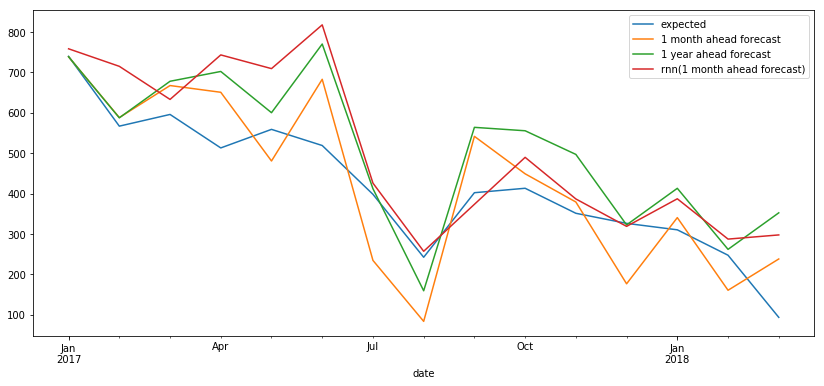

In [44]:
import matplotlib.pyplot as plt
ax = dfpredictions[['expected','1 month ahead forecast','1 year ahead forecast','rnn(1 month ahead forecast)']].plot(figsize=(14,6))


plt.show()

In [251]:
writer = pd.ExcelWriter('pres2.xlsx')
dfpredictions.to_excel(writer,'Sheet 1')
writer.save()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -66.9557     10.295     -6.504      0.000     -87.133     -46.779
trend.2        0.0132      0.002      6.040      0.000       0.009       0.018
ar.L1         -0.1642      0.182     -0.903      0.367      -0.521       0.192
ma.L1         -0.9984      0.234     -4.274      0.000      -1.456      -0.541
ar.S.L12      -0.2713      0.091     -2.991      0.003      -0.449      -0.094
sigma2       1.17e+04   7.24e-05   1.61e+08      0.000    1.17e+04    1.17e+04


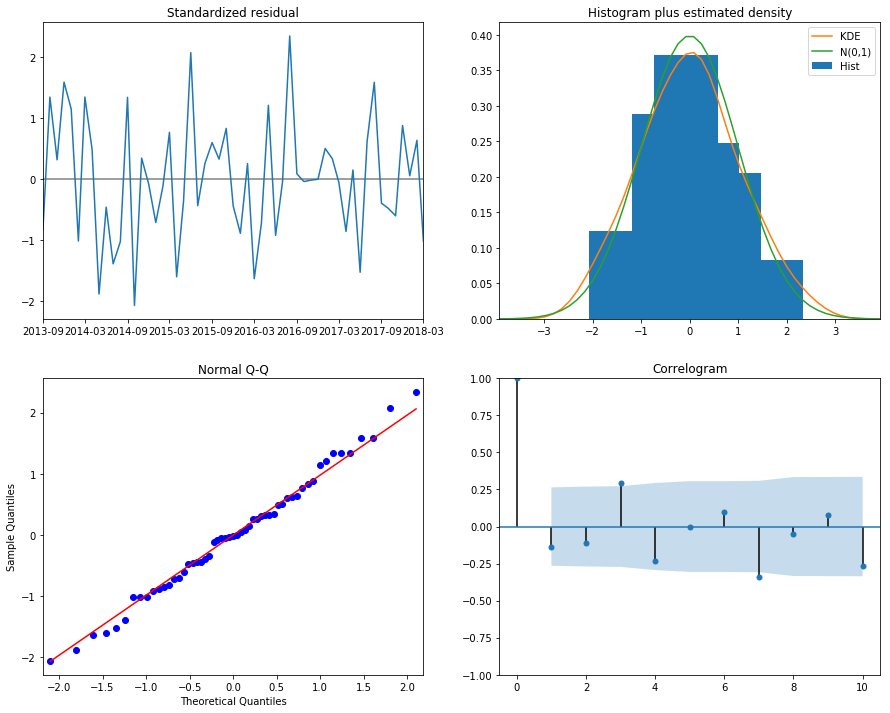

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(commandes2,
                                #commandes1[commandes2.index],
                                trend=np.poly1d([1,0,1]),
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [39]:
import numpy as np
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
import statsmodels.tsa.api as smt
import statsmodels.api as sm
#df=commandes[commandes['PRODUIT']=='6AG00004479']
#commandes=pd.Series(df['NB_COMMANDE'].values,pd.to_datetime(df['DATE_COMMANDE']))
X = commandes2
pourc=0.65
size = int(len(X) * pourc)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions=[]
dfpredictions = pd.DataFrame(columns=["expected","1 month ahead forecast","1 year ahead forecast","delta_mois",
                                      "delta_annee","ic_inf","ic_sup"])
start_params=[1, 0, 0,0,2,2,3]
for t in range(len(test)):
        model = sm.tsa.statespace.SARIMAX(history #,comm_trans.values[0:size+t]
                            #,trend='n'
                            , order=(0,1,1), seasonal_order=(0,1,1,12)
                  ,enforce_stationarity=False,enforce_invertibility=False)
        model_fit = model.fit()
        if t == 0:
            output1 = model_fit.forecast(len(test)#,exog=comm_trans.values[size+t:size+t+len(test)].reshape(-1,1)
                                        )
            #min(12,len(test)-t)                                
        output = model_fit.get_forecast(1#,exog=comm_trans.values[size+t:size+t+1].reshape(-1,1)
        )
        pred=output.predicted_mean[0]
        ci=output.conf_int()
        predictions.append(pred)
        obs = test[t]
        dfpredictions=dfpredictions.append({"expected":obs,
                                            "1 month ahead forecast":pred,
                                            "1 year ahead forecast":output1[t],
                                            "delta_mois":pred-obs,
                                            "delta_annee":output1[t]-obs,
                                            "ic_inf":ci[0,0],
                                            "ic_sup":ci[0,1]},    
                                           ignore_index=True)
        history.append(obs)
    #print('ci_low=%f, predicted=%f, ci_upp=%f,predict_dyn=%f, expected=%f' % (ci['lower y'], pred,ci['upper y'],output1.predicted_mean[t], obs))
#error = mean_squared_error(test, predictions)
#error2 = mean_squared_error(test, output1.predicted_mean)
#print('Test MSE: %.3f, MSE_dyn: %.3f' % (error,error2))

dfpredictions.index=test.index
dfpredictions

,expected,1 month ahead forecast,1 year ahead forecast,delta_mois,delta_annee,ic_inf,ic_sup
date,,,,,,,
2015-11-01,1305.0,1341.973747,1341.973747,36.973747,36.973747,-6.117247e+09,6.117250e+09
2015-12-01,1088.0,1233.500491,1247.973747,145.500491,159.973747,-9.262934e+07,9.263181e+07
2016-01-01,1134.0,1254.089029,1326.973747,120.089029,192.973747,-2.503869e+07,2.504120e+07
2016-02-01,1013.0,1011.534061,1133.973747,-1.465939,120.973747,-8.077142e+06,8.079166e+06
2016-03-01,1019.0,1257.018203,1378.973747,238.018203,359.973747,-6.445695e+07,6.445946e+07
2016-04-01,1068.0,1035.394284,1253.973747,-32.605716,185.973747,-3.275568e+07,3.275775e+07
2016-05-01,1024.0,897.058230,1100.973747,-126.941770,76.973747,-8.797811e+08,8.797829e+08
2016-06-01,1100.0,1342.015550,1494.973747,242.015550,394.973747,-2.684638e+08,2.684665e+08
2016-07-01,766.0,717.394287,967.973747,-48.605713,201.973747,-1.381222e+08,1.381236e+08


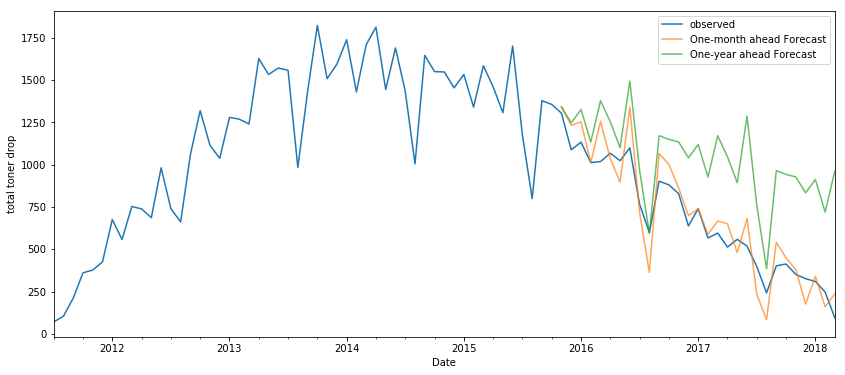

In [37]:
ax = commandes2.plot(label='observed',figsize=(14,6))
dfpredictions['1 month ahead forecast'] .plot(ax=ax, label='One-month ahead Forecast', alpha=.7)
dfpredictions['1 year ahead forecast'] .plot(ax=ax, label='One-year ahead Forecast', alpha=.7)
#ax.fill_between(dfpredictions.index,
                #dfpredictions['ic_inf'] ,
                #dfpredictions['ic_sup'], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('total toner drop')

plt.legend()

plt.show()

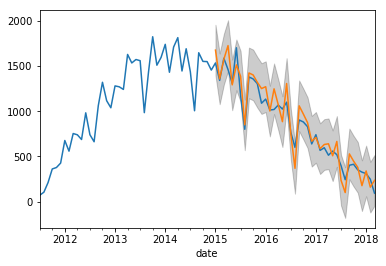

In [64]:
model = sm.tsa.statespace.SARIMAX(commandes2 #,comm_trans.values[0:size+t]
                            #,trend='n'
                            , order=(0,1,1), seasonal_order=(0,1,1,12)
                  ,enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit()
output1 = model_fit.get_prediction( start='2015-01-01', dynamic='2016-01-01')
pred_ci = output1.conf_int()
ax=commandes2.plot()
output1.predicted_mean.plot()
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.show()

In [32]:
pred = results.get_prediction( start='2015-01-01', dynamic='2015-12-01')
pred_ci = pred.conf_int()

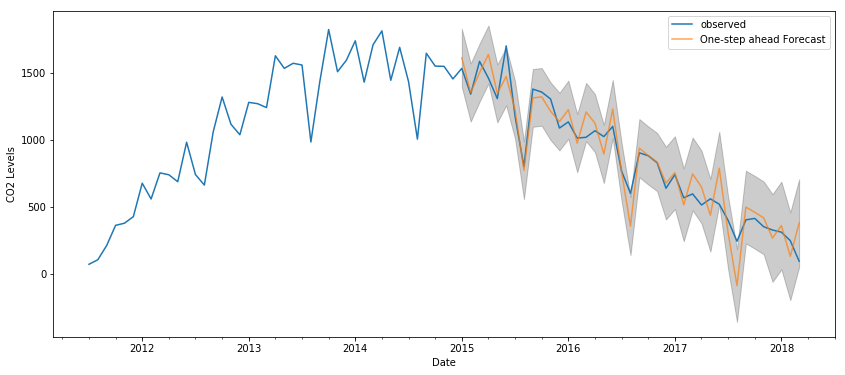

In [33]:
ax = commandes2.plot(label='observed',figsize=(14,6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [68]:
from statsmodels.tsa.api import ExponentialSmoothing

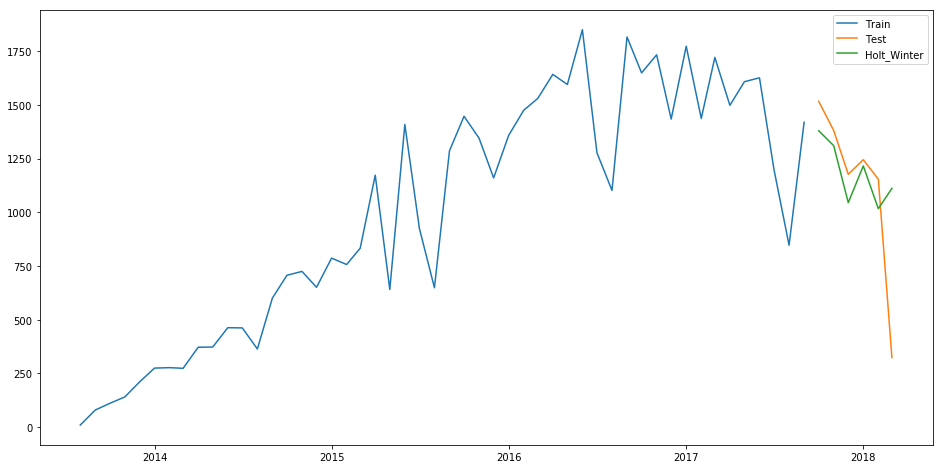

In [119]:
X = commandes3
pourc=0.90
size = int(len(X) * pourc)
train, test = X[0:size], X[size:len(X)]
y_hat_avg = test.values.copy()
fit1 = ExponentialSmoothing(np.asarray(train.values) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
bab = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(pd.Series(bab,test.index), label='Holt_Winter')
plt.legend()
plt.show()

In [6]:
def pred_rnn(serie,pourc):
    look_back = 12
    dataset=[[float(x)] for x in serie.values]
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    size = int(len(X) * pourc)
    train, test = dataset[0:size,:], dataset[size-12:len(dataset),:]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    modelnn=rnn_timeseries_network()
    modelnn.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    testPredict = modelnn.predict(testX)
    testPredict = scaler.inverse_transform(testPredict)
    return testPredict

In [19]:
import numpy as np
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
import statsmodels.api as sm
comm_trans=commandes2[commandes1.index].fillna(0)
X = commandes2
pourc=0.70
size = int(len(X) * pourc)
train, test = X[0:size], X[size:len(X)]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, 
                                            #comm_trans,
                                            trend='n',
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:572.2514454124449
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1074.6357737351414
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:423.1501394757772
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1122.3155018661753
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:545.7830704083127
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1063.1973200522639
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:414.5348910377548
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1049.7555211454612
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:563.7020562309639
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1160.7686130421725
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:397.60300025232567
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1137.212366063059
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:547.2835705255363
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1173.4437411670683
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:396.43057394459026
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1145.3350392759783


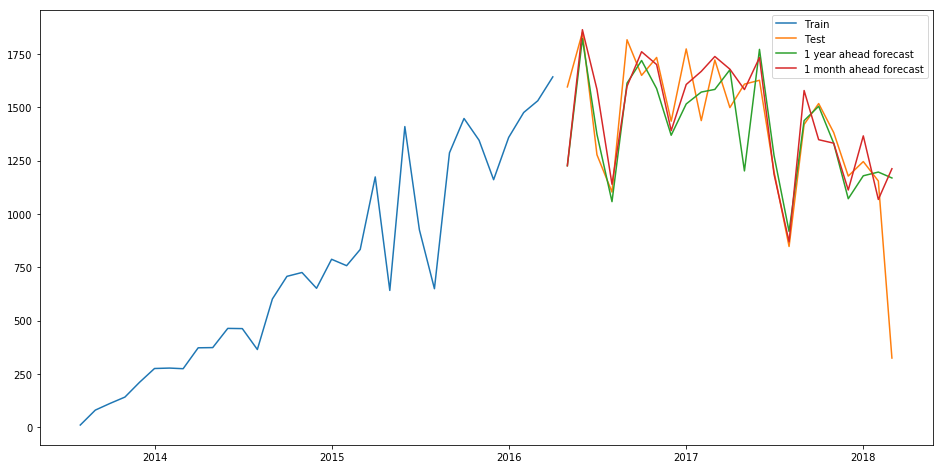

In [52]:
look_back = 12
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
X = commandes3
#comm_trans=commandes2[commandes1.index].fillna(0)
pourc=0.60
size = int(len(X) * pourc)
#testPredict=pred_rnn(X,pourc)
train, test = X[0:size], X[size:len(X)]
y_hat_avg = test.copy()
#start_params = [1, 0, 0,0,2,2,0]
fit1 = sm.tsa.statespace.SARIMAX(X,trend='c',order=(1, 1, 1),seasonal_order=(1,1,0,12),enforce_stationarity=False
                                 ,enforce_invertibility=False).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=test.index[0], end=test.index[-1],dynamic=True)
y_hat_avg['SARIMA2'] = fit1.predict(start=test.index[0], end=test.index[-1])
#fit2 = sm.tsa.statespace.SARIMAX(train,comm_trans[train.index], trend=np.poly1d([1,0,0]),order=(1, 1, 1),seasonal_order=(1,1,1,12),enforce_stationarity=False,
                                            #enforce_invertibility=False).fit(start_params)
#y_hat_avg['SARIMAX'] = fit2.predict(start=test.index[0], end=test.index[-1],exog=comm_trans[test.index].reshape(-1,1) ,dynamic=True)
output1 = fit1.forecast(len(test))
pred=fit1.get_prediction(start=test.index[0])
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
#plt.plot(seasonal_decompose(commandes3).trend,label='trend')
plt.plot(y_hat_avg['SARIMA'], label='1 year ahead forecast')
plt.plot(y_hat_avg['SARIMA2'], label='1 month ahead forecast')
#plt.plot(pd.Series(testPredict.flatten(),test.index), label='RNN')
#plt.plot(y_hat_avg['SARIMAX'], label='SARIMAX')
plt.legend(loc='best')
plt.show()